**Алгоритм решения задачи с описанием основных действий и краткими пояснениями**

**1	Литературный обзор метод выявления мошеннических транзакций**

1.1	Времени на полноценный литературный обзор нет, поэтому вкратце смотрим обзорные и самые цитируемые статьи в базах данных Google Scholar, Science Direct, IEEE Xplore и др.

1.2	Лучшие статьи:
Kuldeep Randhawa et al.  Credit Card Fraud Detection Using AdaBoost and Majority Voting 2018;
Jarrod West et al. Intelligent financial fraud detection: a comprehensive review 2015;
Tahereh Pourhabibi et al. Fraud detection: A systematic literature review of graph-based anomaly detection approaches 2020;
Xun Zhou et al. A state-of-the-art survey of data mining-based fraud detection and credit scoring 2018.

1.3	Лучшие методы по результатам обзора: Self-organizing map, Logistic regression, Support vector machine, Random forest, Hybrid models majority voting methods.

**2	Подготовка данных к анализу**

2.1	Факторы CurrencyCode и CountryCode имеют одинаковые значения для всех транзакций. Удаляем их из набора данных.

2.2	На временные фичи нет времени. Удаляю фактор TransactionStartTime

2.3	Смотрим количество мошеннических транзакций – 140 или 0,175% и ещё немного анализируем данные

2.4	Категорийный фактор ProductCategory переводим в числовой и используя OneHot Encoding

2.5	Нормализация данных

**3	Программирование избранных алгоритмов**

3.1	Разделение данных на данные для тренировки и данные для теста

3.2	….

3.3	Пробуем различные методы: LogisticRegression, LinearDiscriminantAnalysis, KNeighborsClassifier, DecisionTreeClassifier, SVC, RandomForestClassifier

**4	Валидация**

4.1	Из всех алгоритмов выбираем RandomForestClassifier

4.2	Используем его для обнаружения мошеннических транзакций в тестовом наборе – файл preds.csv

4.3	В конце заметил, что ProductCategory немного отличаются в тренировочном и тестовом наборах. Нужно будет удалить не совпадающие категории.

4.4	…

**5	Дальнейшие исследования**

5.1	EDA (разведочный анализ)

5.2	Введение временных фич анализирующих историческое поведение клиентов

5.3	Online learning models – fast detection

5.4	Оптимизация параметром входящих в применяемые модели

5.5	Анализ статистики и типов мошенничества

5.6	Проведение систематического обзора по аналогии с исследованиями в медицине и других областях: Yu Xiao Guidance on conducting a systematic literature review 2017. 

5.7	Поиск и общение со специалистами из данной области (LinkedIn, тематические конференции, признанные научные специалисты в данной области).

5.8	Изучение кода на Kaggle

5.9	Всестороннее изучение вопроса валидации – Validation and Verification AI System David J. Hand and Shakeel Khan

5.10	Идет постоянная эскалация, поэтому совершенствования должен быть непрерывным

5.11	Больше внимания уделить гибридным методам

5.12	Создание общих алгоритмов, позволяющих детектировать различные типы мошенничества

5.13	Потери от ложно положительных тестов намного меньше, чем от ложно отрицательных – нужно использовать это в метриках

5.14	Получение как можно большего количества реальных данных

5.15	Включение в модель данных, связанных с другими областями поведения человека – Investigating the inherent multiplex behavior of network users

5.16	Список лучших журналов и компаний в данной области и следить за ними

5.17	Анализ чувствительности структуры избранных алгоритмов

**6	Ответы на вопросы**

6.1 Какие дополнительные данные могли бы помочь в данной задаче?

На данном этапе сложно ответить на вопрос. Необходимо углубляться в специфику задачи. Пригодилась бы расшифровка типа профиля клиента и рисковости транзакции по мнению внешней системы.

6.2	Какой метод для решения задачи вы бы хотели использовать, но не успели?

Self-organizing map, Random forest, Hybrid models majority voting methods.

6.3	Какая бизнес-метрика будет, на ваш взгляд, основной в данной задаче?

Если имеется ввиду выявления наиболее значимого фактора, то как вариант Channelid. С другой стороны, можно использовать различные методы снижения размерности - РСА, метод упругих карт и др. Можно и по матрице корреляции смотреть, но много где слышал что факторы сильно нелинейные.


In [218]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [219]:
df = pd.read_csv('train_modifide.csv')

In [220]:
#shape
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 79890 rows and 15 columns.


In [221]:
#peek at data
df.sample(5)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,ClientProfile,TrasactionCategory
66711,51841,8545,2203,2113,2612,6,3,airtime,3,1500.0,1500,2,0,2,1
77068,88320,26804,1240,4672,1602,5,15,financial_services,3,2000.0,2000,2,0,3,3
73900,75624,9810,51,3205,369,6,10,airtime,3,21000.0,21000,2,0,1,1
72319,70428,77394,1921,4250,2315,6,10,airtime,3,10000.0,10000,2,0,3,1
30777,55500,109471,4841,3829,3634,4,6,financial_services,2,-50.0,50,2,0,0,3


In [222]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79890 entries, 0 to 79889
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TransactionId       79890 non-null  int64  
 1   BatchId             79890 non-null  int64  
 2   AccountId           79890 non-null  int64  
 3   SubscriptionId      79890 non-null  int64  
 4   CustomerId          79890 non-null  int64  
 5   ProviderId          79890 non-null  int64  
 6   ProductId           79890 non-null  int64  
 7   ProductCategory     79890 non-null  object 
 8   ChannelId           79890 non-null  int64  
 9   Amount              79890 non-null  float64
 10  Value               79890 non-null  int64  
 11  PricingStrategy     79890 non-null  int64  
 12  FraudResult         79890 non-null  int64  
 13  ClientProfile       79890 non-null  int64  
 14  TrasactionCategory  79890 non-null  int64  
dtypes: float64(1), int64(13), object(1)
memory usage: 9.1

In [223]:
#fraud vs. normal transactions 
counts = df.FraudResult.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 79750 non-fraudulent transactions (99.825%) and 140 fraudulent transactions (0.175%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

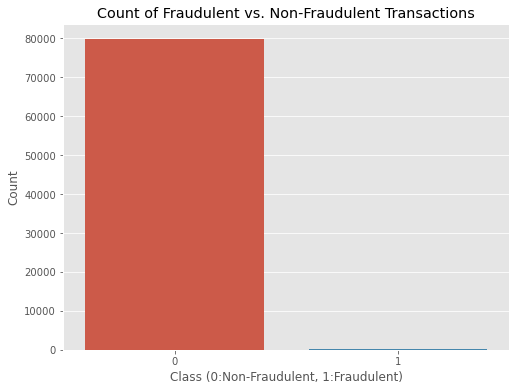

In [224]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [225]:
corr = df.corr()
corr

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Amount,Value,PricingStrategy,FraudResult,ClientProfile,TrasactionCategory
TransactionId,1.000e+00,-8.459e-03,-0.005,-4.713e-04,-0.005,0.001,0.004,0.004,-4.688e-04,-0.002,-4.324e-03,-2.445e-03,-7.041e-04,8.314e-03
BatchId,-8.459e-03,1.000e+00,0.040,7.225e-02,0.168,-0.040,-0.019,-0.077,-2.358e-02,0.014,1.623e-01,-2.397e-03,2.590e-02,9.586e-04
AccountId,-5.160e-03,4.009e-02,1.000,3.576e-01,0.495,-0.220,-0.152,-0.696,-5.399e-02,-0.032,-4.630e-02,-1.845e-02,-3.839e-01,-5.514e-03
SubscriptionId,-4.713e-04,7.225e-02,0.358,1.000e+00,0.152,-0.222,-0.110,-0.432,-5.435e-02,-0.013,9.545e-02,-1.178e-02,-2.384e-01,-7.808e-05
CustomerId,-5.192e-03,1.678e-01,0.495,1.517e-01,1.000,-0.017,-0.024,-0.146,-4.882e-02,0.035,3.688e-01,2.124e-03,4.739e-02,-8.176e-03
ProviderId,1.142e-03,-3.990e-02,-0.220,-2.223e-01,-0.017,1.000,-0.182,0.329,-4.711e-02,-0.069,-1.401e-01,-4.968e-02,2.051e-01,-5.528e-03
ProductId,3.858e-03,-1.938e-02,-0.152,-1.104e-01,-0.024,-0.182,1.000,0.200,1.096e-01,0.098,-1.862e-01,5.749e-02,1.008e-01,2.517e-03
ChannelId,4.375e-03,-7.661e-02,-0.696,-4.315e-01,-0.146,0.329,0.200,1.000,6.925e-02,0.030,7.269e-02,2.221e-02,4.013e-01,3.046e-03
Amount,-4.688e-04,-2.358e-02,-0.054,-5.435e-02,-0.049,-0.047,0.110,0.069,1.000e+00,0.974,-9.767e-02,5.365e-01,2.986e-02,2.090e-03
Value,-1.541e-03,1.369e-02,-0.032,-1.259e-02,0.035,-0.069,0.098,0.030,9.737e-01,1.000,-2.106e-02,5.542e-01,3.926e-02,1.433e-03


Text(0.5, 1.0, 'Heatmap of Correlation')

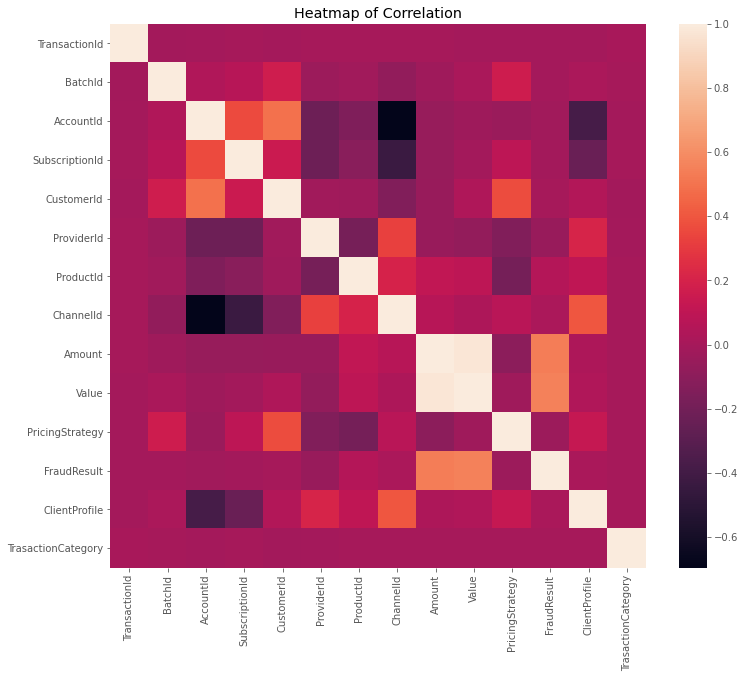

In [226]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [227]:
#skewness
skew_ = df.skew()
skew_

TransactionId        -7.252e-03
BatchId              -1.372e-02
AccountId            -7.115e-01
SubscriptionId       -8.346e-01
CustomerId            4.946e-01
ProviderId           -9.871e-01
ProductId             1.050e+00
ChannelId             3.472e-01
Amount                4.517e+01
Value                 4.564e+01
PricingStrategy       1.567e+00
FraudResult           2.383e+01
ClientProfile         5.467e-01
TrasactionCategory    2.300e-04
dtype: float64

**2.4 Hot-one encoding**

In [228]:
df = pd.get_dummies(data=df, drop_first=True)
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Amount,Value,...,ClientProfile,TrasactionCategory,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,76871,36123,3957,887,4406,6,10,3,1000.0,1000,...,4,3,0,0,0,0,0,0,0,0
1,73770,15642,4841,3829,4406,4,6,2,-20.0,20,...,0,2,0,1,0,0,0,0,0,0
2,26203,53941,4229,222,4683,6,1,3,500.0,500,...,3,2,0,0,0,0,0,0,0,0
3,380,102363,648,2185,988,1,21,3,20000.0,21800,...,3,1,0,0,0,0,0,0,0,1
4,28195,38780,4841,3829,988,4,6,2,-644.0,644,...,0,3,0,1,0,0,0,0,0,0


**2.5 Feature Scaling**

In [229]:
X = df.drop(['FraudResult'], 1)
Y = df['FraudResult']

# Feature scaling of our data
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X.values), index=X.index, columns=X.columns)
train_df=X.join(Y)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79890 entries, 0 to 79889
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   TransactionId                       79890 non-null  float64
 1   BatchId                             79890 non-null  float64
 2   AccountId                           79890 non-null  float64
 3   SubscriptionId                      79890 non-null  float64
 4   CustomerId                          79890 non-null  float64
 5   ProviderId                          79890 non-null  float64
 6   ProductId                           79890 non-null  float64
 7   ChannelId                           79890 non-null  float64
 8   Amount                              79890 non-null  float64
 9   Value                               79890 non-null  float64
 10  PricingStrategy                     79890 non-null  float64
 11  ClientProfile                       79890

**3.1 Splitting Data into Train and Test**

In [230]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(train_df)) < 0.9
train = train_df[mask]
test = train_df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (72015, 22)
Test Shape: (7875, 22)


In [231]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

**Creating a subsample data set with balanced class distributions**

In [232]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.FraudResult.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 129 fraudulent transactions in the train data.


In [233]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['FraudResult'] == 0]
fraud = train[train['FraudResult'] == 1]

In [234]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Amount,Value,...,TrasactionCategory,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,FraudResult
45198,-1.490,-0.692,-0.050,-0.261,0.337,1.041,0.569,0.696,-0.051,-0.094,...,-1.224e+00,-0.141,-0.943,-0.046,-0.005,-0.051,-0.017,-0.115,-0.142,0
17233,1.272,-0.594,-0.551,-1.926,-0.132,0.272,0.569,0.696,0.059,0.016,...,1.224e+00,-0.141,-0.943,-0.046,-0.005,-0.051,-0.017,-0.115,-0.142,0
69819,1.364,1.174,0.853,0.783,1.190,0.272,1.646,0.696,0.710,0.669,...,1.532e-04,-0.141,1.061,-0.046,-0.005,-0.051,-0.017,-0.115,-0.142,0
44240,0.263,-0.641,0.946,0.608,0.170,-0.498,-0.293,-1.093,-0.063,-0.106,...,1.532e-04,-0.141,1.061,-0.046,-0.005,-0.051,-0.017,-0.115,-0.142,0
28950,1.011,-0.011,0.946,0.608,1.179,-0.498,-0.293,-1.093,-0.063,-0.106,...,1.224e+00,-0.141,1.061,-0.046,-0.005,-0.051,-0.017,-0.115,-0.142,0


In [235]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [236]:
subsample = pd.concat([selected, fraud])
len(subsample)

258

In [237]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Amount,Value,...,TrasactionCategory,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,FraudResult
0,-0.514,0.165,0.365,-1.250,0.730,0.272,1.646,0.696,5.976,5.952,...,-1.224e+00,-0.141,1.061,-0.046,-0.005,-0.051,-0.017,-0.115,-0.142,1
1,-0.192,-1.512,-1.987,0.248,-1.506,1.041,0.569,0.696,0.058,0.015,...,1.532e-04,-0.141,-0.943,-0.046,-0.005,-0.051,-0.017,-0.115,-0.142,0
2,-0.180,-1.705,-0.026,-1.378,0.359,-1.268,2.938,0.696,5.976,6.207,...,1.224e+00,-0.141,-0.943,-0.046,-0.005,-0.051,-0.017,-0.115,7.052,1
3,-0.909,-1.358,-1.142,-0.129,-0.698,-1.268,1.646,0.696,2.353,2.317,...,-1.224e+00,-0.141,1.061,-0.046,-0.005,-0.051,-0.017,-0.115,-0.142,1
4,1.688,-0.458,0.674,0.769,1.019,-2.808,1.646,0.696,36.169,36.244,...,1.532e-04,-0.141,1.061,-0.046,-0.005,-0.051,-0.017,-0.115,-0.142,1
5,1.083,1.194,0.946,0.608,0.263,-0.498,-0.293,-1.093,-0.070,-0.099,...,-1.224e+00,-0.141,1.061,-0.046,-0.005,-0.051,-0.017,-0.115,-0.142,0
6,-1.654,-1.328,0.563,1.071,2.484,-0.498,-0.939,-1.093,-1.270,1.106,...,-1.224e+00,-0.141,-0.943,-0.046,-0.005,-0.051,-0.017,-0.115,-0.142,0
7,0.197,0.236,0.760,-0.434,1.101,0.272,-0.723,0.696,0.179,0.136,...,1.532e-04,-0.141,-0.943,-0.046,-0.005,-0.051,-0.017,-0.115,-0.142,0
8,0.462,-1.505,0.946,0.608,1.211,-0.498,-0.293,-1.093,-0.063,-0.106,...,-1.224e+00,-0.141,1.061,-0.046,-0.005,-0.051,-0.017,-0.115,-0.142,0
9,0.883,1.390,0.946,0.608,0.060,-0.498,-0.293,-1.093,-0.063,-0.106,...,1.224e+00,-0.141,1.061,-0.046,-0.005,-0.051,-0.017,-0.115,-0.142,0


Text(0.5, 0, 'FraudResult (0:Non-Fraudulent, 1:Fraudulent)')

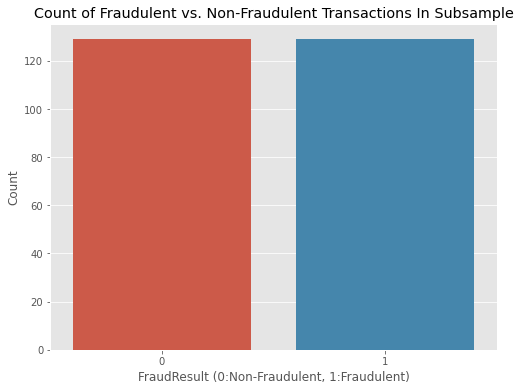

In [238]:
new_counts = subsample.FraudResult.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('FraudResult (0:Non-Fraudulent, 1:Fraudulent)')

In [239]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['FraudResult']]
corr

,FraudResult
TransactionId,-0.003
BatchId,-0.020
AccountId,-0.212
SubscriptionId,-0.164
CustomerId,-0.051
ProviderId,-0.516
ProductId,0.633
ChannelId,0.342
Amount,0.491
Value,0.502


In [240]:
#negative correlations smaller than -0.4
corr[corr.FraudResult < -0.4]

,FraudResult
ProviderId,-0.516


In [241]:
#positive correlations greater than 0.4
corr[corr.FraudResult > 0.4]

,FraudResult
ProductId,0.633
Amount,0.491
Value,0.502
ProductCategory_financial_services,0.460
FraudResult,1.000


<AxesSubplot:xlabel='FraudResult', ylabel='ProviderId'>

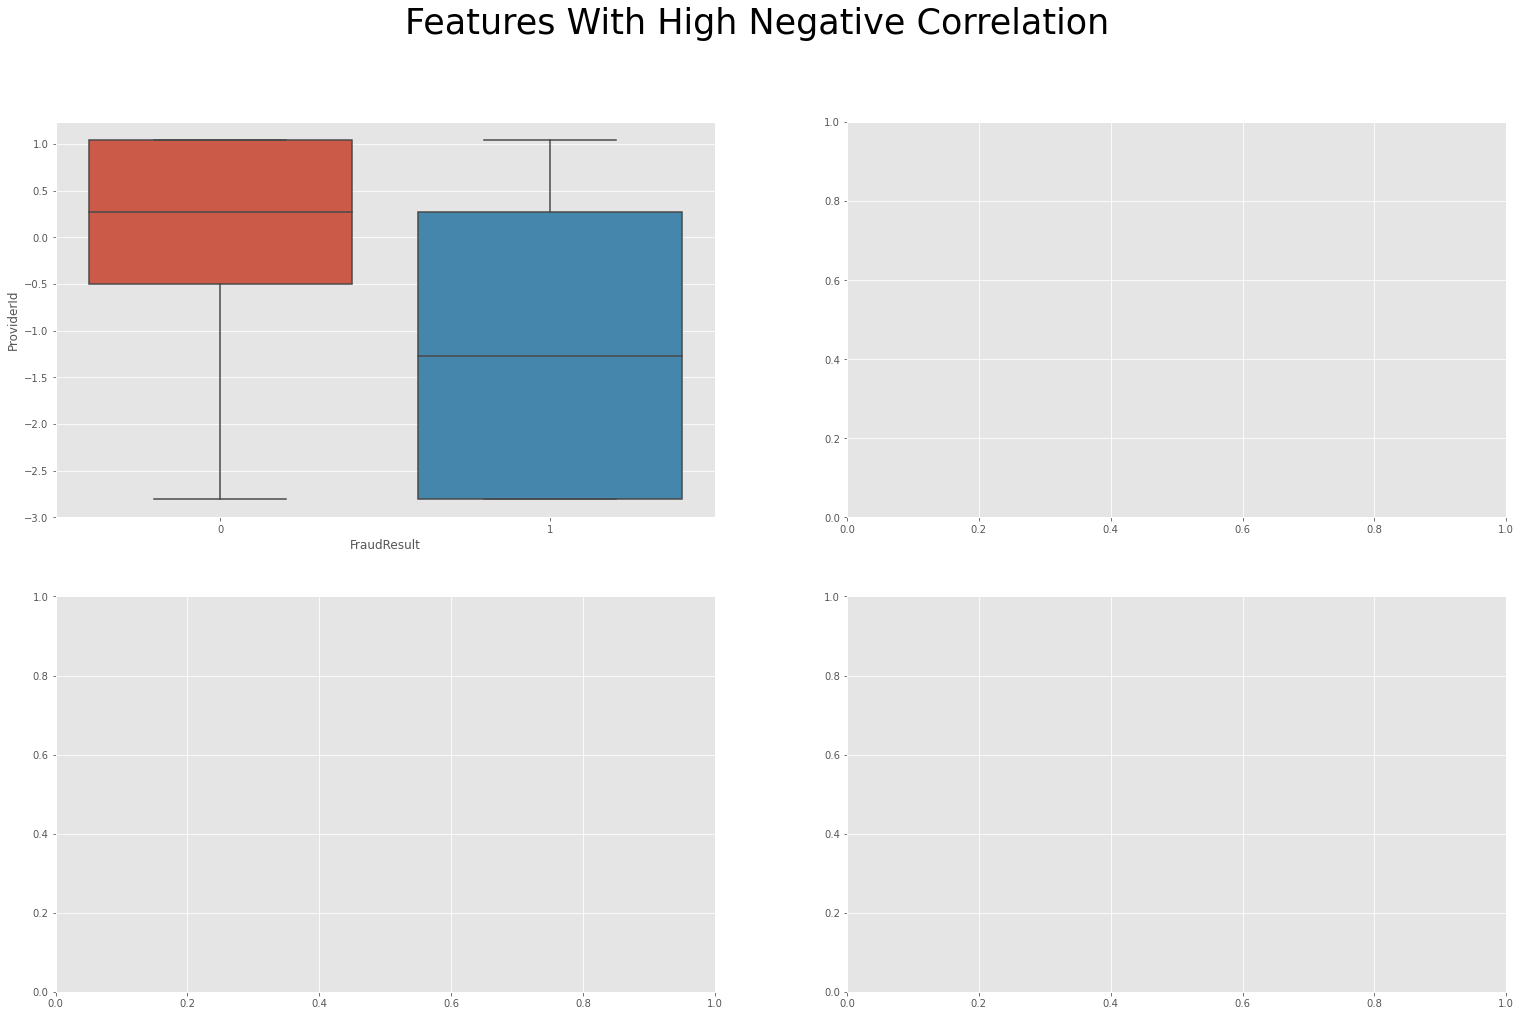

In [242]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="FraudResult", y="ProviderId", data=subsample, ax=axes[0,0])


<AxesSubplot:xlabel='FraudResult', ylabel='Value'>

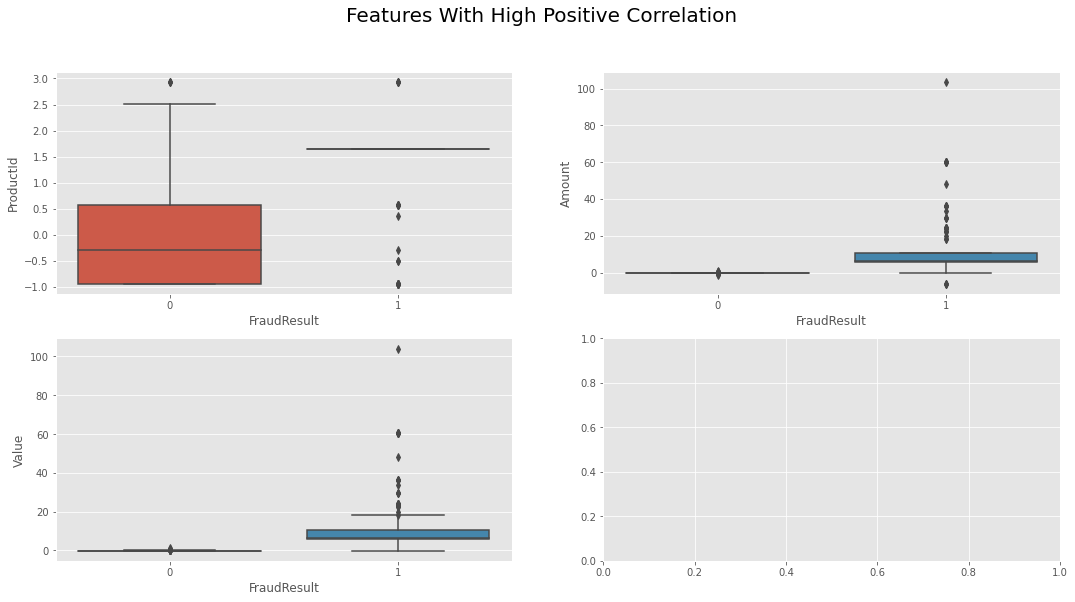

In [243]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="FraudResult", y="ProductId", data=subsample, ax=axes[0,0])
sns.boxplot(x="FraudResult", y="Amount", data=subsample, ax=axes[0,1])
sns.boxplot(x="FraudResult", y="Value", data=subsample, ax=axes[1,0])

**Extreme Outlier Removal**

In [244]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [245]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 258 transactions by 144 transactions to 114 transactions.


**Dimensionality Reduction**

In [246]:
from sklearn.manifold import TSNE

X = df2.drop('FraudResult', axis=1)
y = df2['FraudResult']

In [247]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

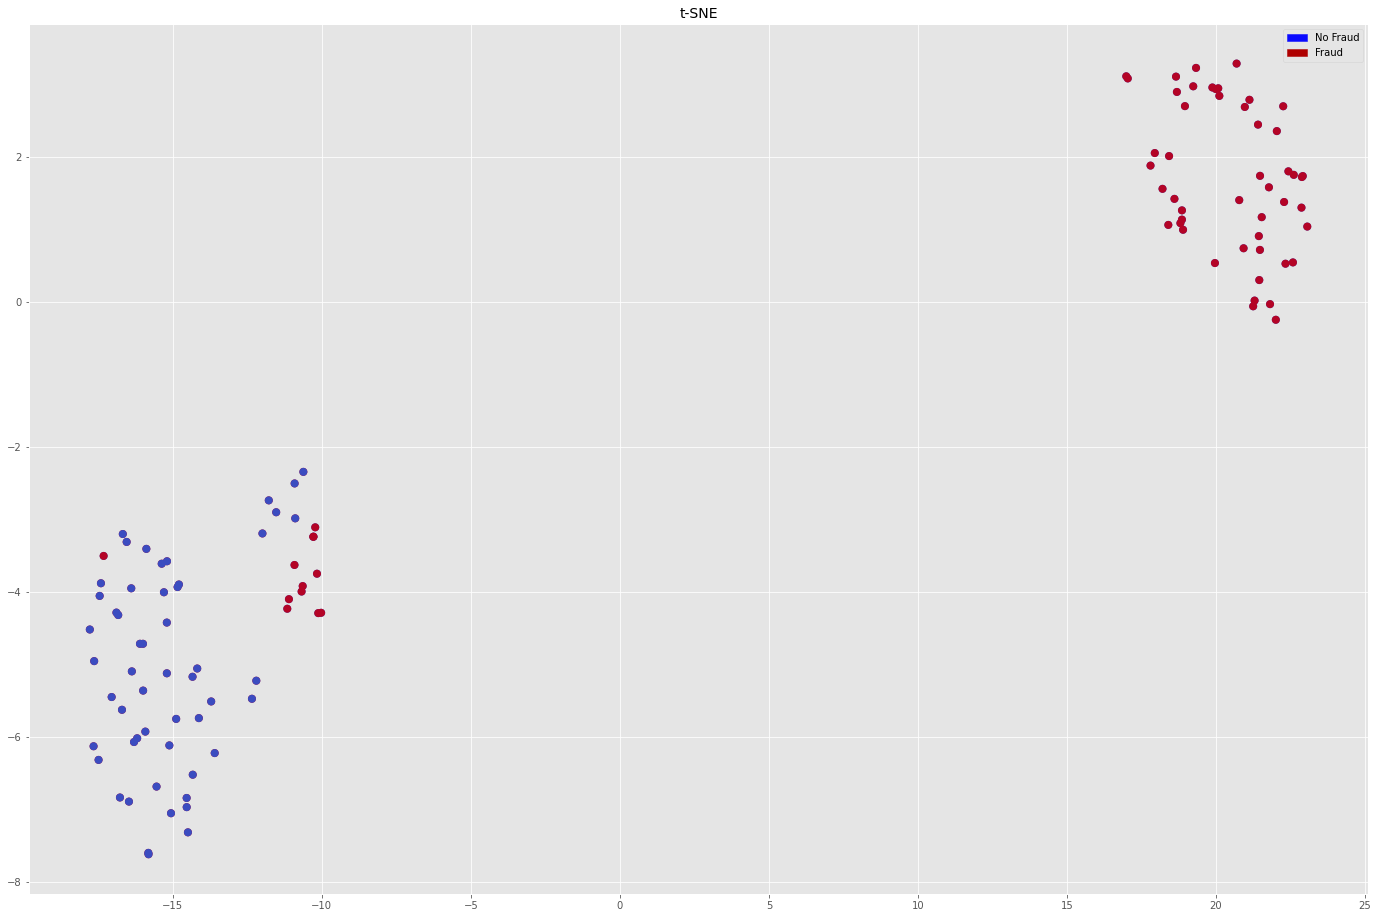

In [248]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])


**Classification Algorithms**

In [249]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [250]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [251]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [252]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (91, 21) (23, 21) 

Y_shapes:
 Y_train: Y_validation:
 (91,) (23,)


In [253]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [254]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.995833 (0.012500)
LDA: 0.995000 (0.015000)
KNN: 0.991667 (0.019094)
CART: 0.943750 (0.081250)
SVM: 1.000000 (0.000000)
RF: 0.985000 (0.037417)


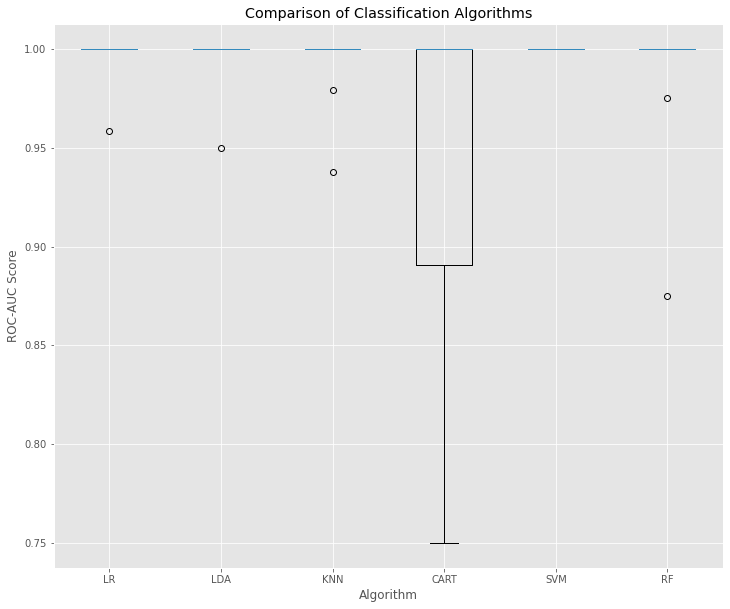

In [255]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

**4 Validation**

In [256]:
clf = RandomForestClassifier()

In [257]:
X = train_df.drop(['FraudResult'], 1)
Y = train_df['FraudResult']
clf.fit(X,Y)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79890 entries, 0 to 79889
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   TransactionId                       79890 non-null  float64
 1   BatchId                             79890 non-null  float64
 2   AccountId                           79890 non-null  float64
 3   SubscriptionId                      79890 non-null  float64
 4   CustomerId                          79890 non-null  float64
 5   ProviderId                          79890 non-null  float64
 6   ProductId                           79890 non-null  float64
 7   ChannelId                           79890 non-null  float64
 8   Amount                              79890 non-null  float64
 9   Value                               79890 non-null  float64
 10  PricingStrategy                     79890 non-null  float64
 11  ClientProfile                       79890

In [258]:
test_df = pd.read_csv('test_modifide.csv')
test_df = pd.get_dummies(data=test_df)




# Feature scaling of our data
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(test_df.values), index=test_df.index, columns=test_df.columns)
test_df=X
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15772 entries, 0 to 15771
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   TransactionId                       15772 non-null  float64
 1   BatchId                             15772 non-null  float64
 2   AccountId                           15772 non-null  float64
 3   SubscriptionId                      15772 non-null  float64
 4   CustomerId                          15772 non-null  float64
 5   ProviderId                          15772 non-null  float64
 6   ProductId                           15772 non-null  float64
 7   ChannelId                           15772 non-null  float64
 8   Amount                              15772 non-null  float64
 9   Value                               15772 non-null  float64
 10  PricingStrategy                     15772 non-null  float64
 11  ClientProfile                       15772

In [259]:
preds = clf.predict(test_df)

**Записываем фактор определяющий машеннические транзакции в файл preds.csv**

In [260]:
from numpy import asarray
from numpy import savetxt
savetxt('preds.csv', preds, delimiter=',')

In [261]:
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**Всего определено 16 мошеннических транзакций в тестовом наборе**